## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer:

In [1]:
# 1. As the score of "Q27: I think a natural disaster would be kind of exciting." increases, how does it affect the probability of being left handed?

# 2. As the score of "Q44:I decorate my things (e.g. stickers on laptop)." increases, how does it affect the probability of being left handed?

# 3. As the score of "Q30: I think horoscopes are fun."increases, how does it affect the probability of being left handed?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import models as model

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso

from scipy.stats import mode

In [3]:
data_raw = pd.read_csv('data.csv', delimiter='\t') #Delineated by tabs not commas

In [4]:
df = data_raw.copy() # Work with the new copy

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:

In [5]:
# Especially with data concerning sexual orientation and gender identity, or other personal data - 
# the invidiual needs to be protected and I recommend having a way to not track the source of the data to a person, but rather to 
# candidate X, state general location such as university, age, but no way to identify the individual
# who gave the information

# For data in general, we as data scientists need to keep in mind about how the data could be used maliciously, such as in identity theft

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [6]:
# Let's check out datatypes, nulls, and then do some simple visualization

In [7]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [9]:
df.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

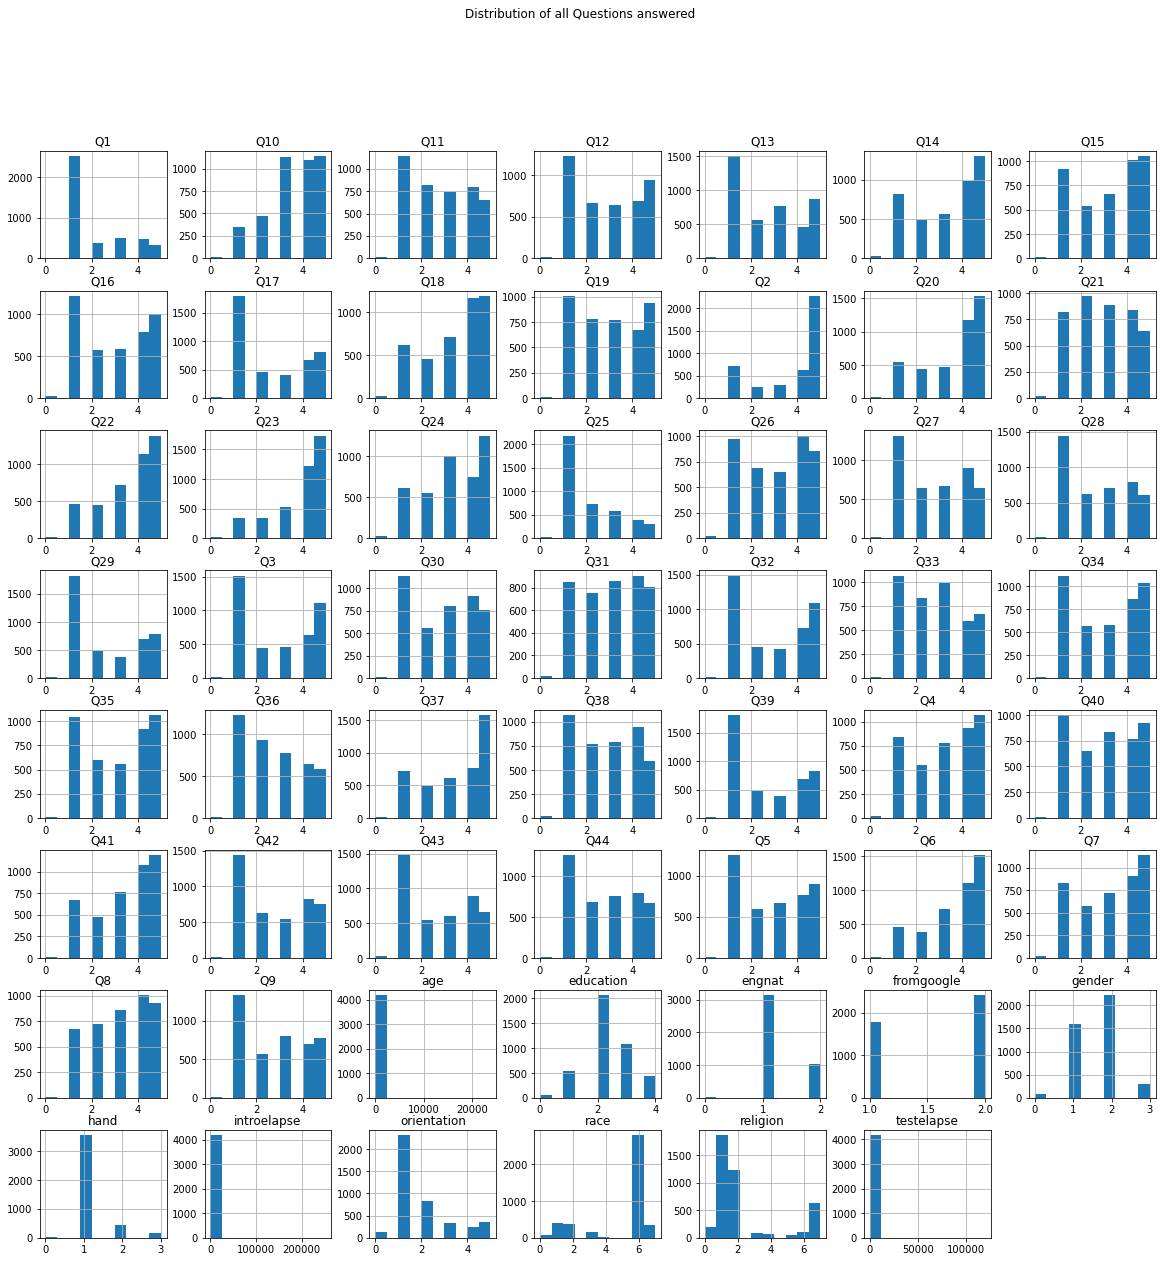

In [10]:
df.hist(figsize=(20, 20));
plt.suptitle('Distribution of all Questions answered');

In [11]:
# https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
x, y = zip(*dict(df['country'].value_counts()).items())

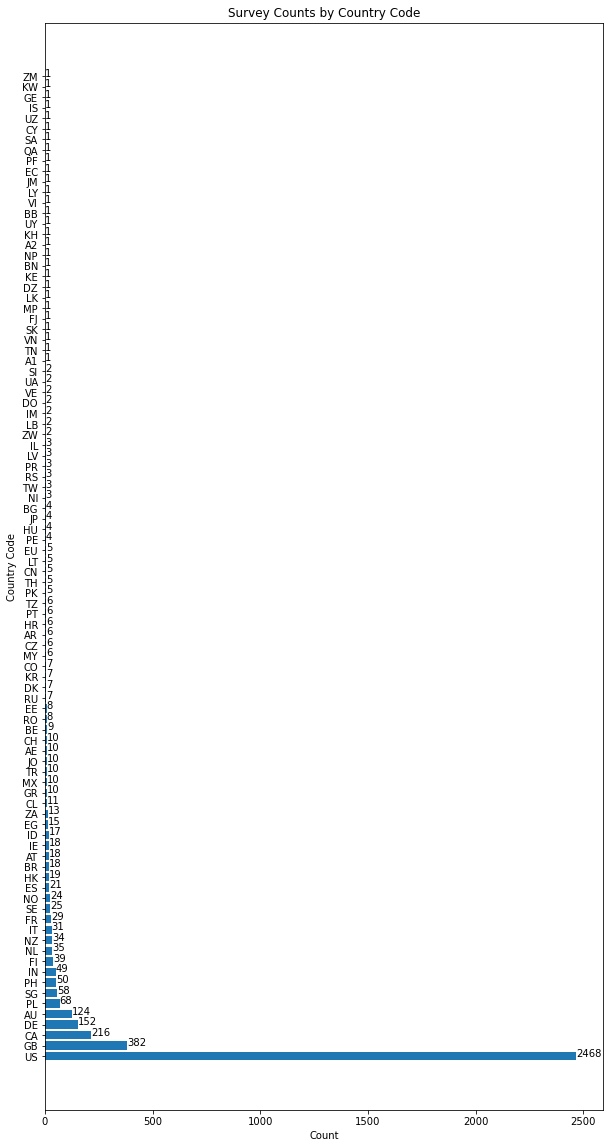

In [12]:
plt.figure(figsize=(10, 20))
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.title('Survey Counts by Country Code');
plt.xlabel('Count');
plt.ylabel('Country Code');

In [13]:
# There isn't anything too interesting that comes out in the data yet

In [14]:
# Majority of the data comes from the USA. There may be a population bias

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: 

In [15]:
# This would be a binominal classification problem. Given the data, the result is that the partipicant is either
# A. Left Handed
# B. Not left handed

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: 

In [16]:
# https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardization%3A,end%20up%20creating%20a%20bais.
# Standardizing our variables allows us to compare measurments that have different units

# given two examples, we could have weights of people and height of people. They are both on different scales
# let's assume kg, and m. In this instance, a person would be between 70 - 100 kg, but between 2.5 - 3.5 meters
# Plugging that information into a linear regression, immediately there would be bias towards the larger numbers

### 7. Give an example of when we might not standardize our variables.

Answer: 

In [17]:
# https://builtin.com/data-science/when-and-why-standardize-your-data
# When we are using a regression method where standardization does not affect the estimator, such as in Logistic Regression
# The idea here goes back to classification, such as the iris and species data. In that instance, we are looking for differences in groups of data
# Logistic Regression is relying on the skew of data to categeorize and label 

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: 

In [18]:
# https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn
# In this instance, I do think we need to standarize data. KNearest Neighbors uses the distance between points and minimizes that distance to categeorize
# The large data may skew towards larger numbers instead of grouping by clusters

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

In [19]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [20]:
# I would recommend removing all collected data from the second page except left/right/both because we are testing for a personality trait that
# may indiciate left handness. These attriibutes of a person are not personality traits.

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: 

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# looking at the definition of k, which in the documentation as n_neighbors

# The professor is implying that we choose the 4 closest points to identify if a person is left handed or not
# Because of the nature of the data collected: 1, 3, 5
# this may be oversampling and produce meaningless or ungeneralizable

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models using GridSearchCV.

In [22]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [23]:
X = df.drop(['introelapse', 'testelapse', 'country','fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation','race', 'religion'], axis=1)
y = df['hand']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [26]:
params={
    'kneighborsclassifier__n_neighbors': [3, 5, 25]
}

In [27]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [28]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 25]})

In [29]:
gs.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [30]:
# Best was k = 3

In [31]:
gs.score(X_test, y_test)

0.8977055449330784

### 11.5 How does a null model do? Create a null model. Does it do better than our best KNN model?

In [32]:
# A Null classifier model is where every prediction is the most often, the mode
y_null = np.ones(len(y)) * mode(y)

In [33]:
accuracy_score(y, y_null[0])

0.8465583173996176

In [34]:
# So, by choosing just 1 the entire time, we got an accuracy of 84 %. This follows with how the majority of people are right handed

In [35]:
# Our null model does not preform better than the knn

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: 

In [36]:
# Regularization is applied by default

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer:

In [37]:
# We don't need to, the estimator will do that automatically

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models using GridSearchCV.

#14. Let's use logistic regression to predict whether the person is left-handed.
Be sure to use the same train/test split with your data as with your kNN model above!
Search over the following hyperparameters:
- l2 regularization with C = [.001, .01, .1, 1, 10, 100]

In [38]:
ms = model.ModelSelection(X, y)

In [39]:
# I built a class of models and it calculates its own X_train and X_test
# by doing this, I can guarntee consistent data
ms.X_train, ms.X_test, ms.y_train, ms.y_test = X_train, X_test, y_train, y_test

In [40]:
lr = LogisticRegression()
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100_000]}
gs = GridSearchCV(estimator=lr, param_grid=params, n_jobs=-1)

In [41]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100000]})

In [42]:
gs.score(X_test, y_test)

0.9990439770554493

In [43]:
# Wow we either overfit or got an amazingly accurate model

In [44]:
# Doing the other portion of Q14:

In [45]:
estimator_list = [LogisticRegression(), Lasso(), Ridge()]

In [90]:
estimator_columns = ['LogisticRegression()-0.001',
                     'LogisticRegression()-0.01',
                     'LogisticRegression()-0.1',
                     'LogisticRegression()-1',
                     'LogisticRegression()-10',
                     'LogisticRegression()-100',
                     'Ridge()-1', 
                     'Ridge()-10', 
                     'Lasso()-1', 
                     'Lasso()-10']

In [91]:
estimator_params = {
    LogisticRegression():{
        'max_iter': [100_000],
        'C': [0.001]
    },
    LogisticRegression():{
        'max_iter': [100_000],
        'C': [0.01]
    },
    LogisticRegression():{
        'max_iter': [100_000],
        'C': [0.1]
    },
    LogisticRegression():{
        'max_iter': [100_000],
        'C': [1]
    },
    LogisticRegression():{
        'max_iter': [100_000],
        'C': [10]
    },
    LogisticRegression():{
        'max_iter': [100_000],
        'C': [100]
    },
    Ridge():{
        'alpha': [1],
        'max_iter': [100_000],
        'normalize': [True]
    },
    Ridge():{
        'alpha': [10],
        'max_iter': [100_000],
        'normalize': [True]
    },
    Lasso(): {
        'alpha': [1],
        'max_iter': [100_000],
        'normalize': [True]
    }, 
    Lasso(): {
    'alpha': [10],
    'max_iter': [100_000],
    'normalize': [True]
    }, 
    }

In [92]:
grid_search_objects = ms.make_grid_search_no_pre(list(estimator_params.keys()), list(estimator_params.values()))

In [93]:
scores, objects = ms.evaluate_grid_search(grid_search_objects)

In [94]:
# I'm going to regenerate the previous KNN findings here with my class so I can easily create a dataframe

In [95]:
knn_estimator_params = {
    KNeighborsClassifier():{
        'kneighborsclassifier__n_neighbors': [3]
    },
    KNeighborsClassifier():{
        'kneighborsclassifier__n_neighbors': [5]
    },
    KNeighborsClassifier():{
        'kneighborsclassifier__n_neighbors': [25]
    },
}

In [96]:
knn_gs_pipes, knn_gs_objects = ms.make_grid_search(ms.preprocessing, list(knn_estimator_params.keys()), list(knn_estimator_params.values()))

In [97]:
knn_scores, knn_objects = ms.evaluate_grid_search(knn_gs_objects)

In [98]:
knn_columns = ['KNN()-3','KNN()-5','KNN()-25',]

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer:

In [99]:
# From the EDA we did with seeing the catgeorical data, it is not normalized but maybe because the score is skewed either to the left or right,
# We may have a statistical conclusion to finding if there is a personality trait that can predict left handnesness

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

Answer:

In [100]:
df_results = pd.DataFrame(scores, index=estimator_columns, columns=['Test Accuracy Score'])

In [101]:
knn_results = pd.DataFrame(knn_scores, index=knn_columns, columns=['Test Accuracy Score'])

In [102]:
result = pd.concat([df_results, knn_results])

In [103]:
# Quickly calculating accuracy on train data

In [104]:
train_score = [objects[i].score(X_train, y_train) for i in range(len(objects))]

In [105]:
knn_train_score = [knn_objects[i].score(X_train, y_train) for i in range(len(knn_objects))]

In [106]:
train_results = pd.DataFrame(train_score, index=estimator_columns, columns=['Train Accuracy Score'])

In [107]:
knn_train_results = pd.DataFrame(knn_train_score, index=knn_columns, columns=['Train Accuracy Score'])

In [108]:
train_result = pd.concat([train_results, knn_train_results])

In [109]:
result.join(train_result)

,Test Accuracy Score,Train Accuracy Score
LogisticRegression()-0.001,0.870937,0.838432
LogisticRegression()-0.01,0.910134,0.893881
LogisticRegression()-0.1,0.993308,0.993945
LogisticRegression()-1,0.998088,0.997132
LogisticRegression()-10,0.998088,1.000000
LogisticRegression()-100,0.999044,1.000000
Ridge()-1,0.746843,0.751745
Ridge()-10,0.172408,0.178426
Lasso()-1,-0.005233,0.000000
Lasso()-10,-0.005233,0.000000


|  Model |Test Accuracy Score   | Train Accuracy Score |
|---|---|---|
|  LogisticRegression()-0.001 |0.870937	|0.838432
|LogisticRegression()-0.01 |0.910134	|0.893881
|LogisticRegression()-0.1	|0.993308	|0.993945
|LogisticRegression()-1	|0.998088	|0.997132
|LogisticRegression()-10|0.998088	|1.000000
|LogisticRegression()-100 |	0.999044|	1.000000
|  Ridge()-1 | 0.746843	|0.751745
|  Ridge()-10 |0.172408	|0.178426
| Lasso()-1	  |  -0.005233	|0.000000
| Lasso()-10  |-0.005233	|0.000000
|   KNN()-3	|  0.897706	|0.934990
|   KNN()-5	| 0.899618	|0.906310
|KNN()-25	|0.882409	|0.851179

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer:

In [88]:
# Logistic Regression, it perfectly mapped the training data, however it scored almost perfect on the test accuracy score, so I am not sure
# how to interpert that result

# KNN3 is overfit to training score with 93% on train but 89% on test

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer:

In [89]:
# As K increases, it seems that the model becomes more generalizable, increasing variance
# my earlier statement on k=4 is rejected, where k=4 may have a strong bias towards the closest data entries

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

In [ ]:
# https://shapeofdata.wordpress.com/2013/05/07/k-nearest-neighbors/#:~:text=Switching%20to%20KNN%20reduces%20the,run%20the%20risk%20of%20overfitting.

# 1. Increase K to reduce overfitting
# 2. 

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer:

In [110]:
# LogisticRegression with a C > 0.1
# The training data gets close to 100% accuracy and looks overfit - OR it is a very good model to predict left handness in individuals

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer:

In [111]:
# As C increases, the bias increases and the variance decreases

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer:

In [126]:
coef_list = [objects[i].best_estimator_.coef_ for i in range(len(objects))]

In [151]:
logistic_coefs = coef_list[1:6]

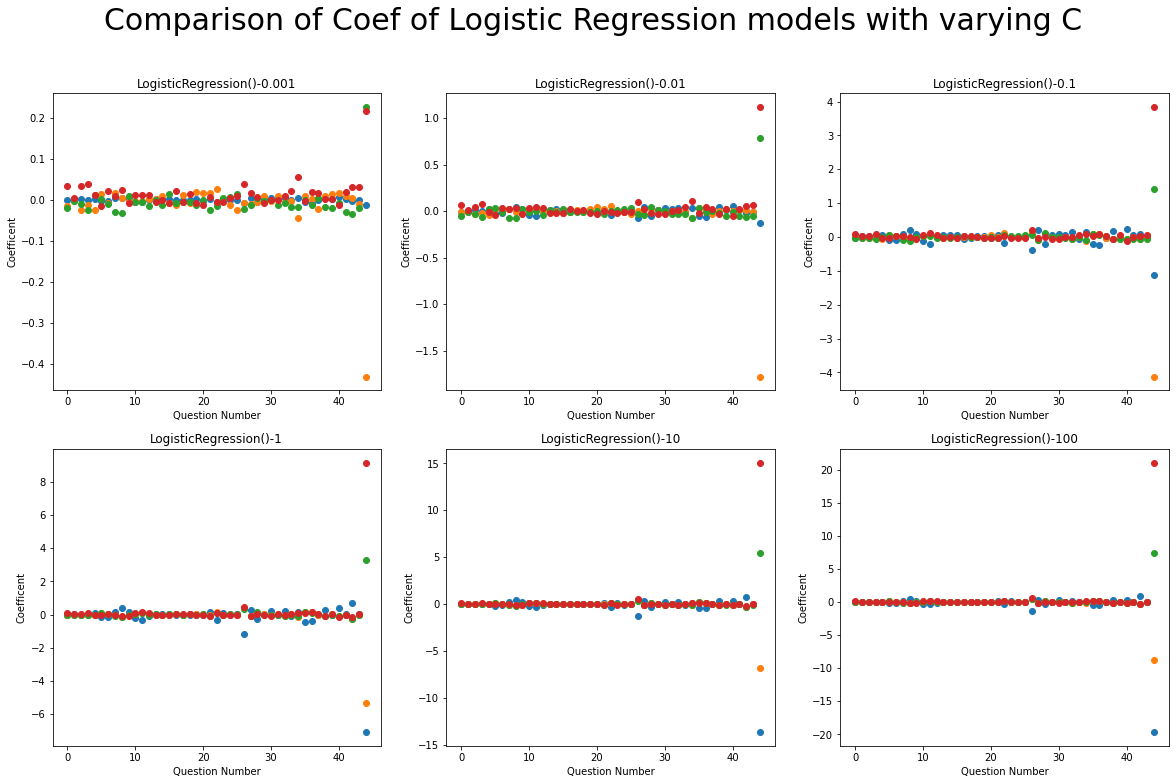

In [167]:
# I am not sure how to plot a bunch of nested arrays so this looks absolutely horribly, but it works
plt.figure(figsize=(20,12))
plt.suptitle('Comparison of Coef of Logistic Regression models with varying C', fontsize=30)
plt.subplot(2, 3, 1)
plt.title('LogisticRegression()-0.001')
plt.xlabel('Question Number')
plt.ylabel('Coefficent')
plt.scatter(range(len(coef_list[0][0])), coef_list[0][0])
plt.scatter(range(len(coef_list[0][0])), coef_list[0][1])
plt.scatter(range(len(coef_list[0][0])), coef_list[0][2])
plt.scatter(range(len(coef_list[0][0])), coef_list[0][3])
plt.subplot(2, 3, 2)
plt.title('LogisticRegression()-0.01')
plt.xlabel('Question Number')
plt.ylabel('Coefficent')
plt.scatter(range(len(coef_list[0][0])), coef_list[1][0])
plt.scatter(range(len(coef_list[0][0])), coef_list[1][1])
plt.scatter(range(len(coef_list[0][0])), coef_list[1][2])
plt.scatter(range(len(coef_list[0][0])), coef_list[1][3])
plt.subplot(2, 3, 3)
plt.title('LogisticRegression()-0.1')
plt.xlabel('Question Number')
plt.ylabel('Coefficent')
plt.scatter(range(len(coef_list[0][0])), coef_list[2][0])
plt.scatter(range(len(coef_list[0][0])), coef_list[2][1])
plt.scatter(range(len(coef_list[0][0])), coef_list[2][2])
plt.scatter(range(len(coef_list[0][0])), coef_list[2][3])
plt.subplot(2, 3, 4)
plt.title('LogisticRegression()-1')
plt.xlabel('Question Number')
plt.ylabel('Coefficent')
plt.scatter(range(len(coef_list[0][0])), coef_list[3][0])
plt.scatter(range(len(coef_list[0][0])), coef_list[3][1])
plt.scatter(range(len(coef_list[0][0])), coef_list[3][2])
plt.scatter(range(len(coef_list[0][0])), coef_list[3][3])
plt.subplot(2, 3, 5)
plt.title('LogisticRegression()-10')
plt.xlabel('Question Number')
plt.ylabel('Coefficent')
plt.scatter(range(len(coef_list[0][0])), coef_list[4][0])
plt.scatter(range(len(coef_list[0][0])), coef_list[4][1])
plt.scatter(range(len(coef_list[0][0])), coef_list[4][2])
plt.scatter(range(len(coef_list[0][0])), coef_list[4][3])
plt.subplot(2, 3, 6)
plt.title('LogisticRegression()-100')
plt.xlabel('Question Number')
plt.ylabel('Coefficent')
plt.scatter(range(len(coef_list[0][0])), coef_list[5][0])
plt.scatter(range(len(coef_list[0][0])), coef_list[5][1])
plt.scatter(range(len(coef_list[0][0])), coef_list[5][2])
plt.scatter(range(len(coef_list[0][0])), coef_list[5][3])

In [170]:
fit_list = [objects[i].best_estimator_.intercept_ for i in range(len(objects))]

In [174]:
len(fit_list[0])

4

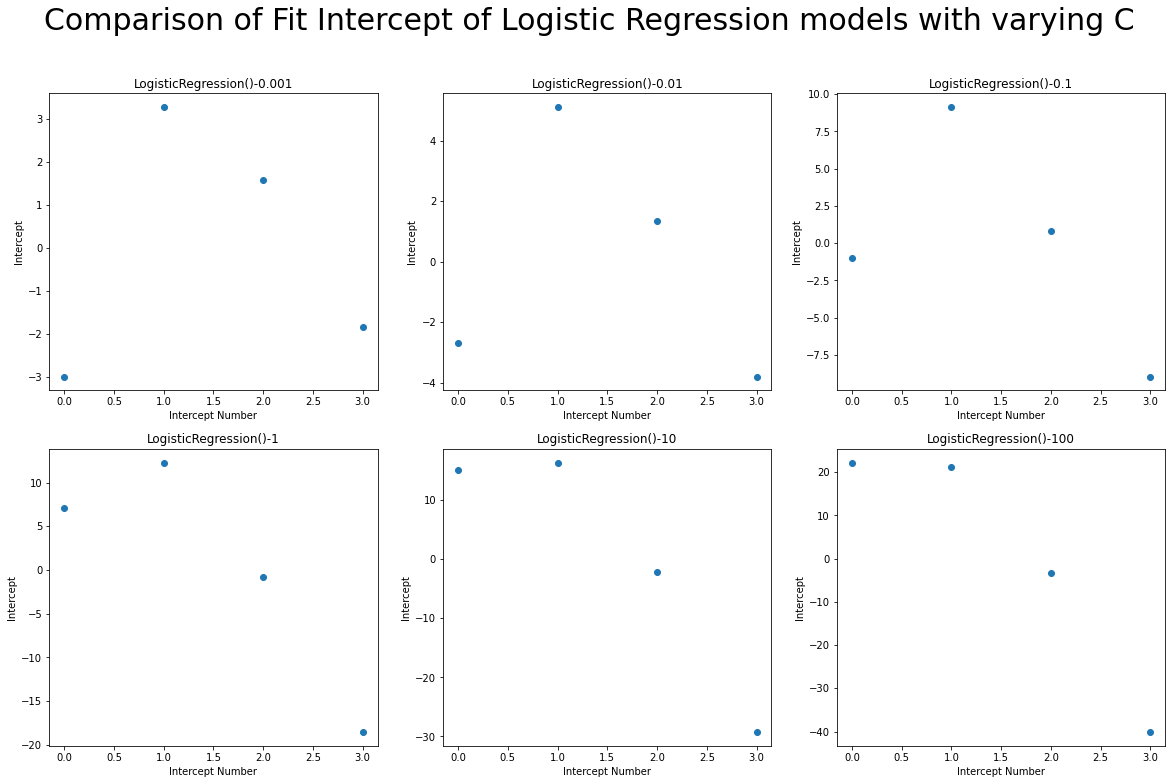

In [176]:
# I am not sure how to plot a bunch of nested arrays so this looks absolutely horribly, but it works
plt.figure(figsize=(20,12))
plt.suptitle('Comparison of Fit Intercept of Logistic Regression models with varying C', fontsize=30)
plt.subplot(2, 3, 1)
plt.title('LogisticRegression()-0.001')
plt.xlabel('Intercept Number')
plt.ylabel('Intercept')
plt.scatter(range(len(fit_list[0])), fit_list[0])
plt.subplot(2, 3, 2)
plt.title('LogisticRegression()-0.01')
plt.xlabel('Intercept Number')
plt.ylabel('Intercept')
plt.scatter(range(len(fit_list[0])), fit_list[1])
plt.subplot(2, 3, 3)
plt.title('LogisticRegression()-0.1')
plt.xlabel('Intercept Number')
plt.ylabel('Intercept')
plt.scatter(range(len(fit_list[0])), fit_list[2])
plt.subplot(2, 3, 4)
plt.title('LogisticRegression()-1')
plt.xlabel('Intercept Number')
plt.ylabel('Intercept')
plt.scatter(range(len(fit_list[0])), fit_list[3])
plt.subplot(2, 3, 5)
plt.title('LogisticRegression()-10')
plt.xlabel('Intercept Number')
plt.ylabel('Intercept')
plt.scatter(range(len(fit_list[0])), fit_list[4])
plt.subplot(2, 3, 6)
plt.title('LogisticRegression()-100')
plt.xlabel('Intercept Number')
plt.ylabel('Intercept')
plt.scatter(range(len(fit_list[0])), fit_list[5])

In [177]:
# Looking at both the graphs, we can easily see that the larger C creates larger intercepts and larger coefficents

# in the context of this problem, the more we oversample, the more likely the linear model is to the overfit to the data and the lkess generalizable it can 
# be to predict either left or right, but rather have a perfectly overfit line

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

In [178]:
# To deal with overfitting for a logistic regression model, I recommend
# 1. Reduce the size of the C parameter 
# 2. Check independent Xs for multilinear collinearity
# 3. Reduce amount of Independent numerical features X to tune 

### 23.5 How might you deal with the imbalanced dataset?

1. Use something other than accuracy as a scoring metric. Balancd Accuracy and F1 score would be better scoring metrics.
1. Oversample the majority class.
1. Undersample the majority class.
1. Create synthetic data.

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer:

### 25. Instantiate, fit, and score a logistic regression model with no regularization. Interpret the coefficient for `Q1`.

Answer:

In [181]:
lr_answer = LogisticRegression(max_iter=1_000_000, n_jobs=-1, penalty='none')

In [183]:
lr_answer.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, n_jobs=-1, penalty='none')

In [184]:
lr_answer.score(X_test, y_test)

0.997131931166348

In [192]:
np.mean([lr_answer.coef_[i][0] for i in range(4)])

-8.675993257156733e-11

In [ ]:
# Taking the average of all 4 coefficents for Q1 over all validation sessions
# There is a negative correlation between Q1 and whether or not a person is left handed

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer:

|  Model |Test Accuracy Score   | Train Accuracy Score |
|---|---|---|
|  LogisticRegression()-0.001 |0.870937	|0.838432
|LogisticRegression()-0.01 |0.910134	|0.893881
|LogisticRegression()-0.1	|0.993308	|0.993945
|LogisticRegression()-1	|0.998088	|0.997132
|LogisticRegression()-10|0.998088	|1.000000
|LogisticRegression()-100 |	0.999044|	1.000000
|  Ridge()-1 | 0.746843	|0.751745
|  Ridge()-10 |0.172408	|0.178426
| Lasso()-1	  |  -0.005233	|0.000000
| Lasso()-10  |-0.005233	|0.000000
|   KNN()-3	|  0.897706	|0.934990
|   KNN()-5	| 0.899618	|0.906310
|KNN()-25	|0.882409	|0.851179

In [ ]:
# Refering to the markdown table again, if I were to choose a single model to present to the client, 
# I would choose Logistic Regression-0.01, because it seems to generalize by underfitting the training data but more accurately predicting the test data

In [193]:
# If the client were to request a competing model, I would refer to the overfit KNN-25 model because of the same attributes of underfitting the training
# data but more generalizable to the test data

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer:

In [194]:
# bringing back the answers from question 1:

In [195]:
# 1. As the score of "Q27: I think a natural disaster would be kind of exciting." increases, how does it affect the probability of being left handed?

# 2. As the score of "Q44:I decorate my things (e.g. stickers on laptop)." increases, how does it affect the probability of being left handed?

# 3. As the score of "Q30: I think horoscopes are fun."increases, how does it affect the probability of being left handed?

In [196]:
# Let's look at the coefficent to see if we can identify any correlation

In [198]:
objects[1]

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01], 'max_iter': [100000]})

In [199]:
# I've selected the chosen estimator object, let's check its  coefficents

In [202]:
q27 = [objects[1].best_estimator_.coef_[i][26] for i in range(4)]
q44 = [objects[1].best_estimator_.coef_[i][43] for i in range(4)]
q30 = [objects[1].best_estimator_.coef_[i][29] for i in range(4)]

In [203]:
np.mean(q27)

([-0.06994110288946448,
  0.002904210230297904,
  -0.029099172191351552,
  0.0961360648505199],
 [-0.006745731410620562,
  -0.012185511145480384,
  -0.05198630799630093,
  0.0709175505524032],
 [0.009831744523826935,
  0.012350921210719729,
  0.011201134909498497,
  -0.03338380064404383])

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)